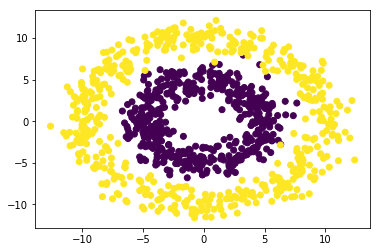

In [5]:
from __future__ import print_function, division
#from future.utils import iteritems
from builtins import range, input
from get_data import xor_data
from get_data import donut_data
from get_data import fig_data
# Note: you may need to update your version of future
# sudo pip install -U future
import numpy as np
import matplotlib.pyplot as plt
#from util import get_data, get_xor, get_donut
from datetime import datetime



Xtrain,Ytrain=donut_data()
Xtest,Ytest=donut_data()
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=Ytrain)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree=dtree.fit(Xtrain,Ytrain)

predictions = dtree.predict(Xtrain)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Ytrain,predictions))
print(confusion_matrix(Ytrain,predictions))



             precision    recall  f1-score   support

          0       1.00      1.00      1.00       500
          1       1.00      1.00      1.00       500

avg / total       1.00      1.00      1.00      1000

[[500   0]
 [  0 500]]


In [7]:
predictions_ = dtree.predict(Xtest)
print(classification_report(Ytest,predictions_))
print(confusion_matrix(Ytest,predictions_))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       500
          1       0.97      0.98      0.98       500

avg / total       0.98      0.98      0.98      1000

[[487  13]
 [ 10 490]]


In [8]:
import graphviz 
#from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  


clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("XOR")

'XOR.pdf'

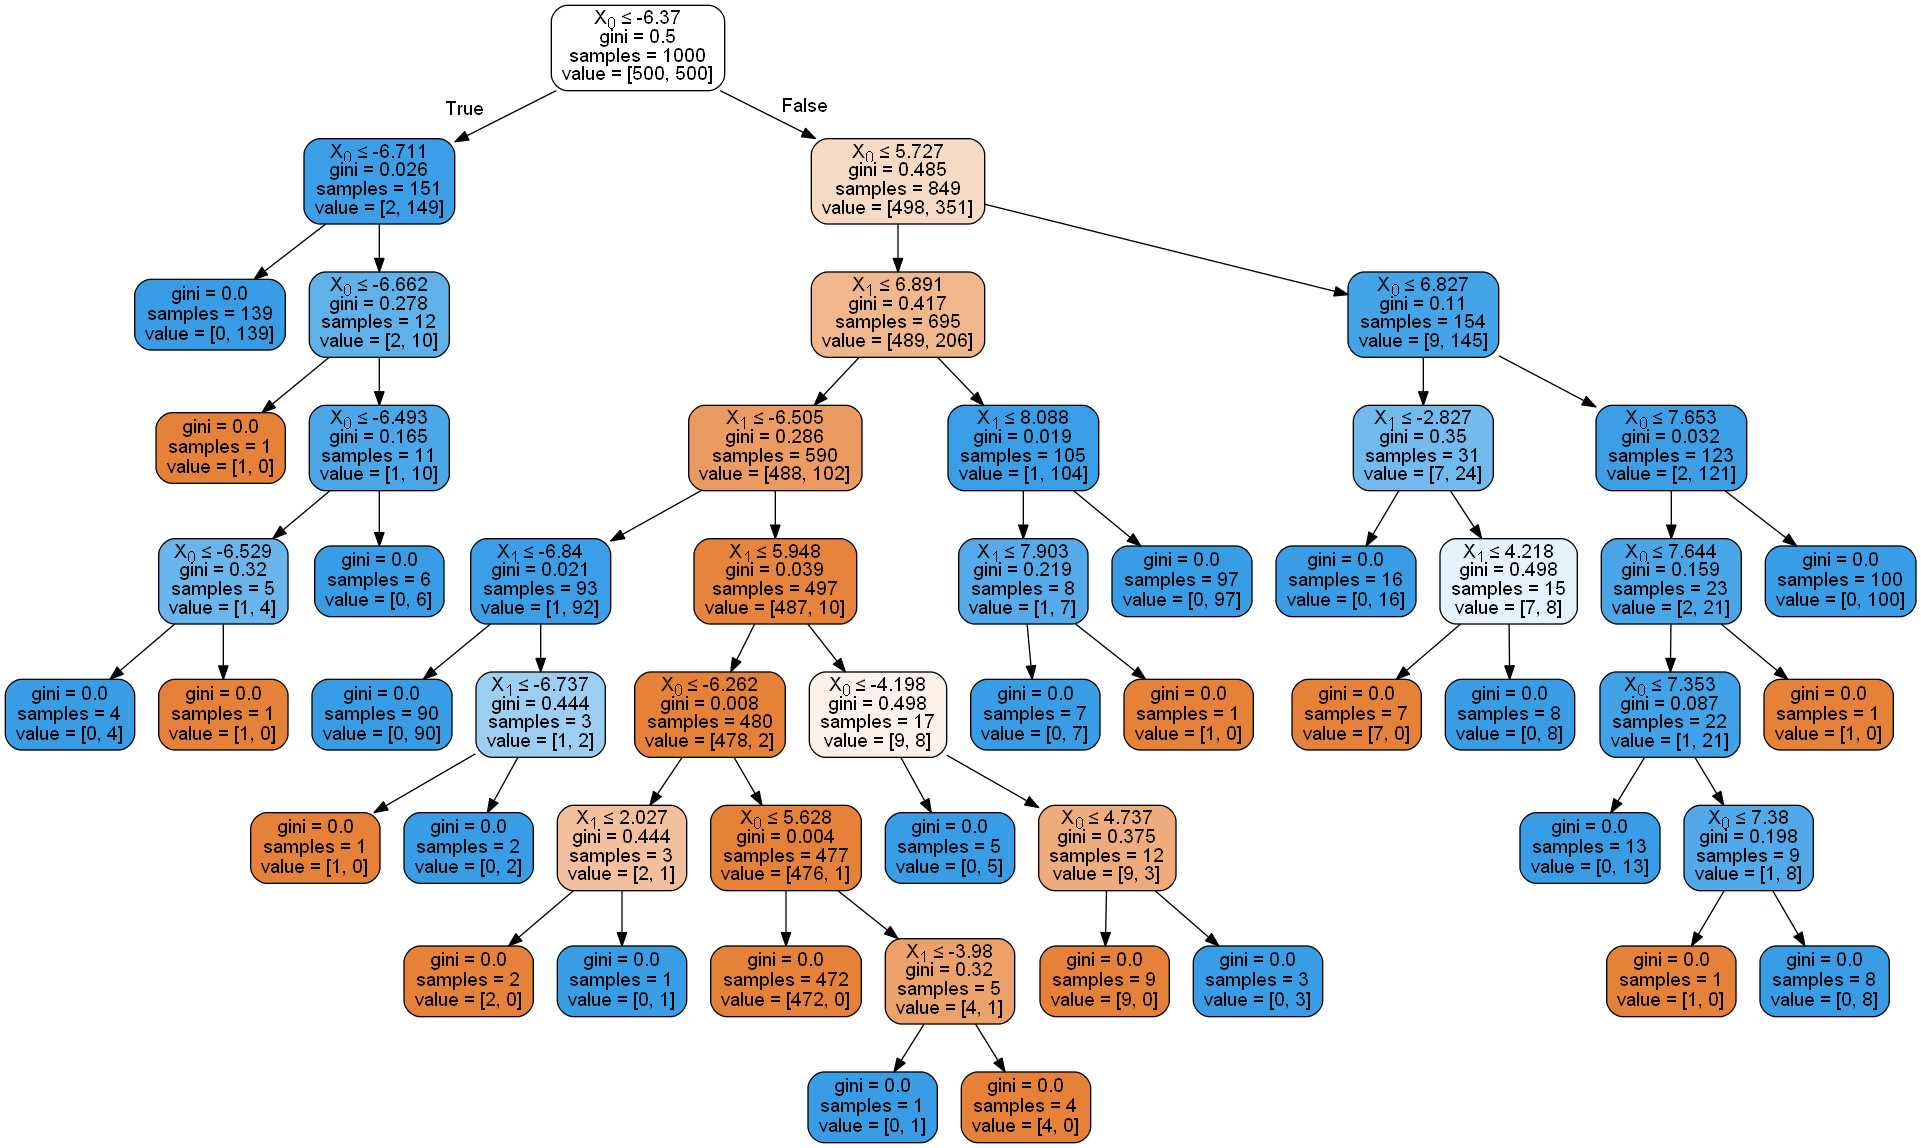

In [9]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\niava\\Anaconda3\\Library\\bin\\graphviz'

from sklearn.externals.six import StringIO   
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())